# Diabetes Data

## The Problem

*Diabetes is a chronic health condition affecting millions worldwide, with rates continuing to rise due to lifestyle and dietary patterns. Early diagnosis and treatment are crucial, but prevention remains the most effective long-term strategy. This project seeks to predict diabetes onset by identifying key health and behavioral indicators using survey data from the Behavioral Risk Factor Surveillance System (BRFSS). By analyzing factors such as blood pressure, body mass index (BMI), physical health, mental health, and general health status, it aims to build predictive models that can differentiate individuals at risk of developing diabetes from those who are not.*

## Source

*Source: BRFSS - Behavioral Risk Factor Surveillance System*

*Samples: 253,680 rows, 22 features*

*Bias Note: Data is self-reported, possibly leading to inaccurate or biased responses.*

*Work Cited:*

*The BRFSS Data User Guide June 2013, Centers for Disease Control and Prevention, www.cdc.gov/brfss/data_documentation/pdf/userguidejune2013.pdf.
Worsley, Nathan. “Diabetes Health Indicators Dataset.” Kaggle, 8 Nov. 2021, www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset.*


## Guiding Quesiton 
*Can we predict whether an individual is at risk of developing diabetes (either prediabetes or diabetes) based on their health and behavioral indicators?*

## Data Preperation

In [21]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [15]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [16]:
# Checking for null values
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [17]:
# normalize BMI, Age, PhyHlth, MentHlt
diabetes['BMI'] = (diabetes['BMI']-diabetes['BMI'].min())/( diabetes['BMI'].max()-diabetes['BMI'].min())
diabetes['Age'] = (diabetes['Age']-diabetes['Age'].min())/( diabetes['Age'].max()-diabetes['Age'].min())
diabetes['MentHlth'] = (diabetes['MentHlth']-diabetes['MentHlth'].min())/( diabetes['MentHlth'].max()-diabetes['MentHlth'].min())
diabetes['PhysHlth'] = (diabetes['PhysHlth']-diabetes['PhysHlth'].min())/( diabetes['PhysHlth'].max()-diabetes['PhysHlth'].min())

diabetes

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.6,0.500000,1.0,0.0,0.666667,4.0,3.0
1,0.0,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.000000,0.0,0.0,0.500000,6.0,1.0
2,0.0,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,1.0,1.000000,1.0,0.0,0.666667,4.0,8.0
3,0.0,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.000000,0.0,0.0,0.833333,3.0,6.0
4,0.0,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.1,0.000000,0.0,0.0,0.833333,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,0.383721,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.166667,0.0,1.0,0.333333,6.0,7.0
253676,2.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.000000,1.0,0.0,0.833333,2.0,4.0
253677,0.0,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.083333,5.0,2.0
253678,0.0,1.0,0.0,1.0,0.127907,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.000000,0.0,1.0,0.500000,5.0,1.0


## Data Exploration (EDA)

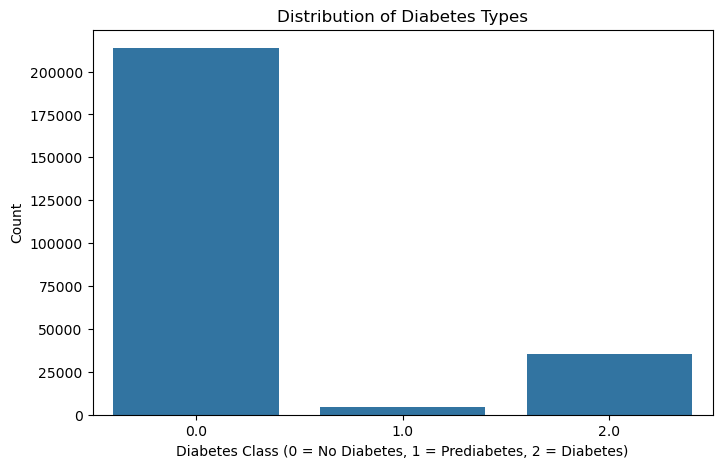

In [18]:
# Three different types of diabetes. 0: no diabetes, 1: Prediabetes, 2: Diabetes
plt.figure(figsize=(8,5))
sns.countplot(x='Diabetes_012', data=diabetes)
plt.title('Distribution of Diabetes Types')
plt.xlabel('Diabetes Class (0 = No Diabetes, 1 = Prediabetes, 2 = Diabetes)')
plt.ylabel('Count')
plt.show()

*you can see that the data is overly populated by No Diabetes (imbalanced) so that needs to change that so we can balanced the dataset*

In [19]:
# combine prediabetes and diabetes because we are examining people at risk (1) and people who are not (0)
diabetes['Diabetes_binary'] = diabetes['Diabetes_012'].apply(lambda x: 0 if x == 0 else 1)
diabetes = diabetes.drop(columns=['Diabetes_012'])
print(diabetes['Diabetes_binary'].value_counts())

Diabetes_binary
0    213703
1     39977
Name: count, dtype: int64


In [22]:
# Since the data is imbalanced lets balance it first by oversampling the minority
df_majority = diabetes[diabetes['Diabetes_binary'] == 0]
df_minority = diabetes[diabetes['Diabetes_binary'] != 0]

df_minority_upsampled = resample(
    df_minority,
    replace=True,  
    n_samples=len(df_majority), 
    random_state=42
)

diabetes_balanced = pd.concat([df_majority, df_minority_upsampled])

diabetes_balanced = diabetes_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(diabetes_balanced['Diabetes_binary'].value_counts())

Diabetes_binary
1    213703
0    213703
Name: count, dtype: int64


In [23]:
diabetes_balanced.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,427406.000000,427406.000000,427406.000000,427406.000000,427406.000000,427406.000000,427406.000000,427406.000000,427406.000000,427406.000000,...,427406.000000,427406.000000,427406.000000,427406.000000,427406.000000,427406.000000,427406.000000,427406.000000,427406.000000,427406.000000
mean,0.553886,0.521778,0.974649,0.206666,0.473536,0.060303,0.142719,0.708135,0.615752,0.789523,...,0.093731,2.812848,0.123354,0.188938,0.246471,0.455185,0.630554,4.928754,5.719580,0.500000
std,0.497088,0.499526,0.157188,0.082716,0.499300,0.238048,0.349787,0.454621,0.486418,0.407648,...,0.291454,1.109966,0.269469,0.331645,0.430956,0.497988,0.239120,1.027245,2.170739,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,0.151163,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.500000,4.000000,4.000000,0.000000
50%,1.000000,1.000000,1.000000,0.186047,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.666667,5.000000,6.000000,0.500000
75%,1.000000,1.000000,1.000000,0.244186,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,4.000000,0.066667,0.166667,0.000000,1.000000,0.833333,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,8.000000,1.000000


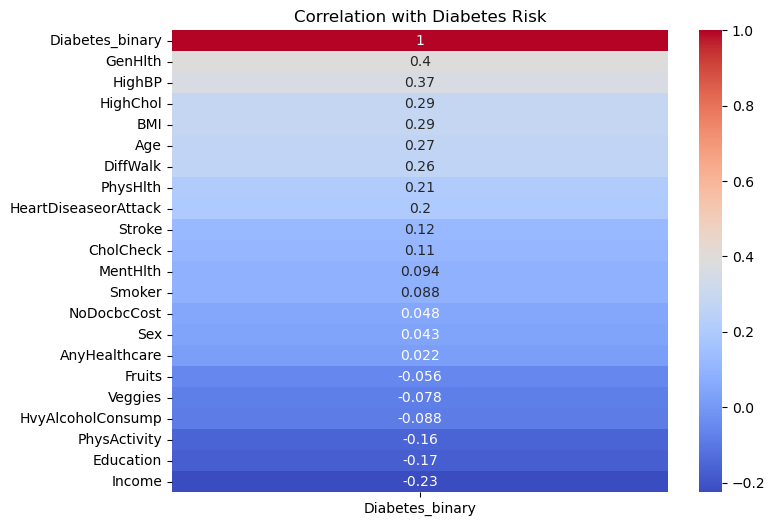

In [24]:
# Taking a look at the correlations between different variables and the diabetes indicator.
plt.figure(figsize=(8, 6))
sns.heatmap(diabetes_balanced.corr(numeric_only=True)[['Diabetes_binary']].sort_values('Diabetes_binary', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Diabetes Risk")
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')  # Save the figure
plt.show()

## Modeling

In [27]:
# Train test split 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

np.random.seed(420)

train = diabetes_balanced.sample(frac=0.8)
test = diabetes_balanced.drop(index=train.index)

y_train = train['Diabetes_binary']
X_train = train.drop(columns=['Diabetes_binary'])
y_test = test['Diabetes_binary']
X_test = test.drop(columns=['Diabetes_binary'])


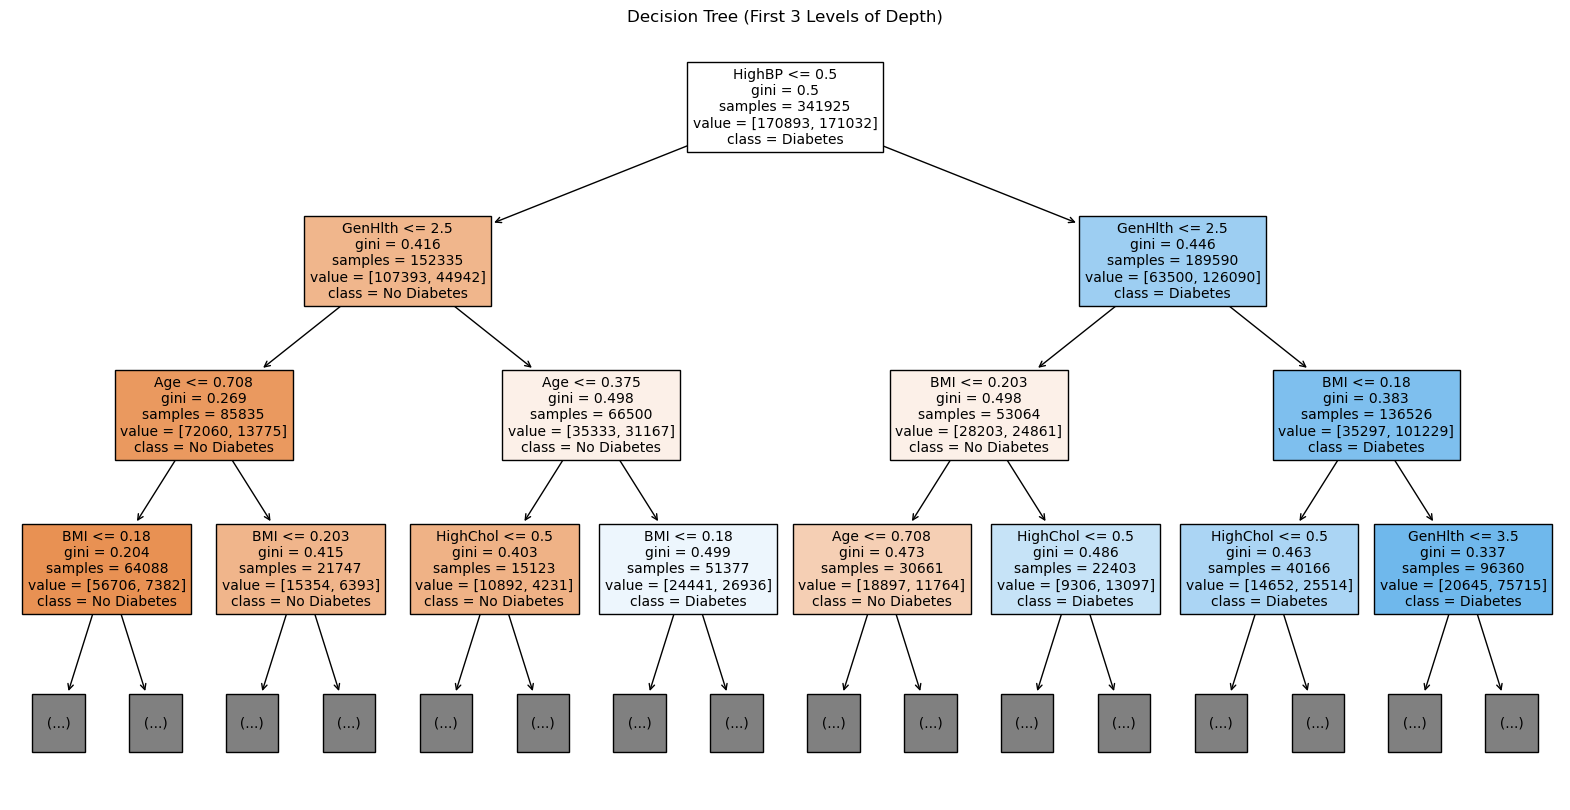

0.8151992395993274 0.787297762075783


In [29]:
# fitting the tree and visualizing 
T = DecisionTreeClassifier(max_depth=15)
T.fit(X_train, y_train)

train_score = T.score(X_train, y_train)
test_score = T.score(X_test, y_test)


plt.figure(figsize=(20, 10)) 
plot_tree(T, 
          feature_names=X_train.columns, 
          class_names=['No Diabetes', 'Diabetes'], 
          filled=True, 
          max_depth=3, 
          fontsize=10)
plt.title("Decision Tree (First 3 Levels of Depth)")
# plt.savefig('decision_tree.png', dpi=300) 
plt.show()
print(train_score,test_score)

In [31]:
# testing different tree depths 
ran = np.arange(5,51,1)

train_scores = []
test_scores = []

for num in ran:
    T = DecisionTreeClassifier(max_depth=num)
    T.fit(X_train, y_train)

    train_score = T.score(X_train, y_train)
    test_score = T.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.728580829129195, 0.7346932806902099, 0.7395773927030782, 0.7450522775462455, 0.7510009505008408, 0.7570110404328435, 0.7649630766981063, 0.7751816918914967, 0.7859033413760328, 0.7998303721576369, 0.8152723550486217, 0.8335950866418074, 0.8519733859764568, 0.8702668713899246, 0.8878701469620531, 0.9052453023323829, 0.9215734444688163, 0.9354946260144769, 0.9474533889010748, 0.9576486071506909, 0.9663932148863055, 0.9728361482781311, 0.9782759377056373, 0.9826072969218396, 0.9860875923082547, 0.9884068143598742, 0.9899948819185493, 0.9909219858156029, 0.9916209695108577, 0.992024566790963, 0.9922175915771002, 0.9923170285881406, 0.9923872194194633, 0.9924457117788988, 0.9924661841047013, 0.9924778825765884, 0.9924778825765884, 0.9924778825765884, 0.9924778825765884, 0.9924778825765884, 0.9924778825765884, 0.9924778825765884, 0.9924778825765884, 0.9924778825765884, 0.9924778825765884, 0.9924778825765884]
[0.725447760321007, 0.7313789029140979, 0.7356956516652824, 0.7412407435570477, 0

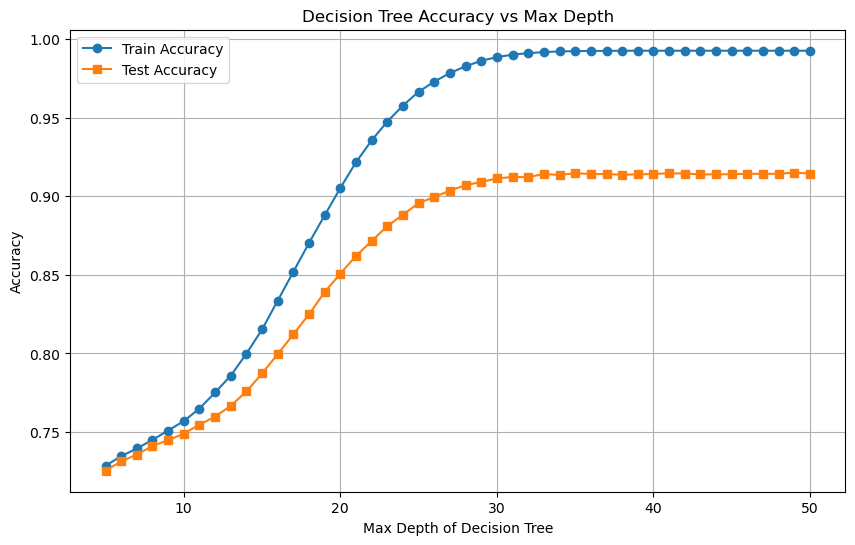

In [32]:
#Visualizing accuracy of test and train for different depths
plt.figure(figsize=(10, 6))
plt.plot(ran, train_scores, label='Train Accuracy', marker='o')
plt.plot(ran, test_scores, label='Test Accuracy', marker='s')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()
plt.grid(True)
plt.savefig('accuracy_vs_depth.png', dpi=300, bbox_inches='tight') 
plt.show()

*In plotting the test accuracies I can see that it levels out around 30. To avoid overfitting I am going to find the lowest depth that is within 1% of the best accuracy score. This way I will have the simplest tree I can have but still have close to the highest accuracy.*

In [36]:
# this is my way of finding the best accuracy and then establishing a threshold and finding the best depth. 
max_depths = list(range(1, 51))  

best_accuracy = 0
for acc in test_scores:
    if acc > best_accuracy:
        best_accuracy = acc

threshold = best_accuracy * 0.99

best_depth = None

# finding lowest best depth 
for i in range(len(test_scores)):
    if test_scores[i] >= threshold:
        best_depth = max_depths[i]
        break 

print(f"Best test accuracy: {best_accuracy}")
print(f"Selected depth: {best_depth}")


Best test accuracy: 0.9149401621412946
Selected depth: 24


*Now that I have my desired depth I am going to fit and visualize a tree with the new depth of 24.*

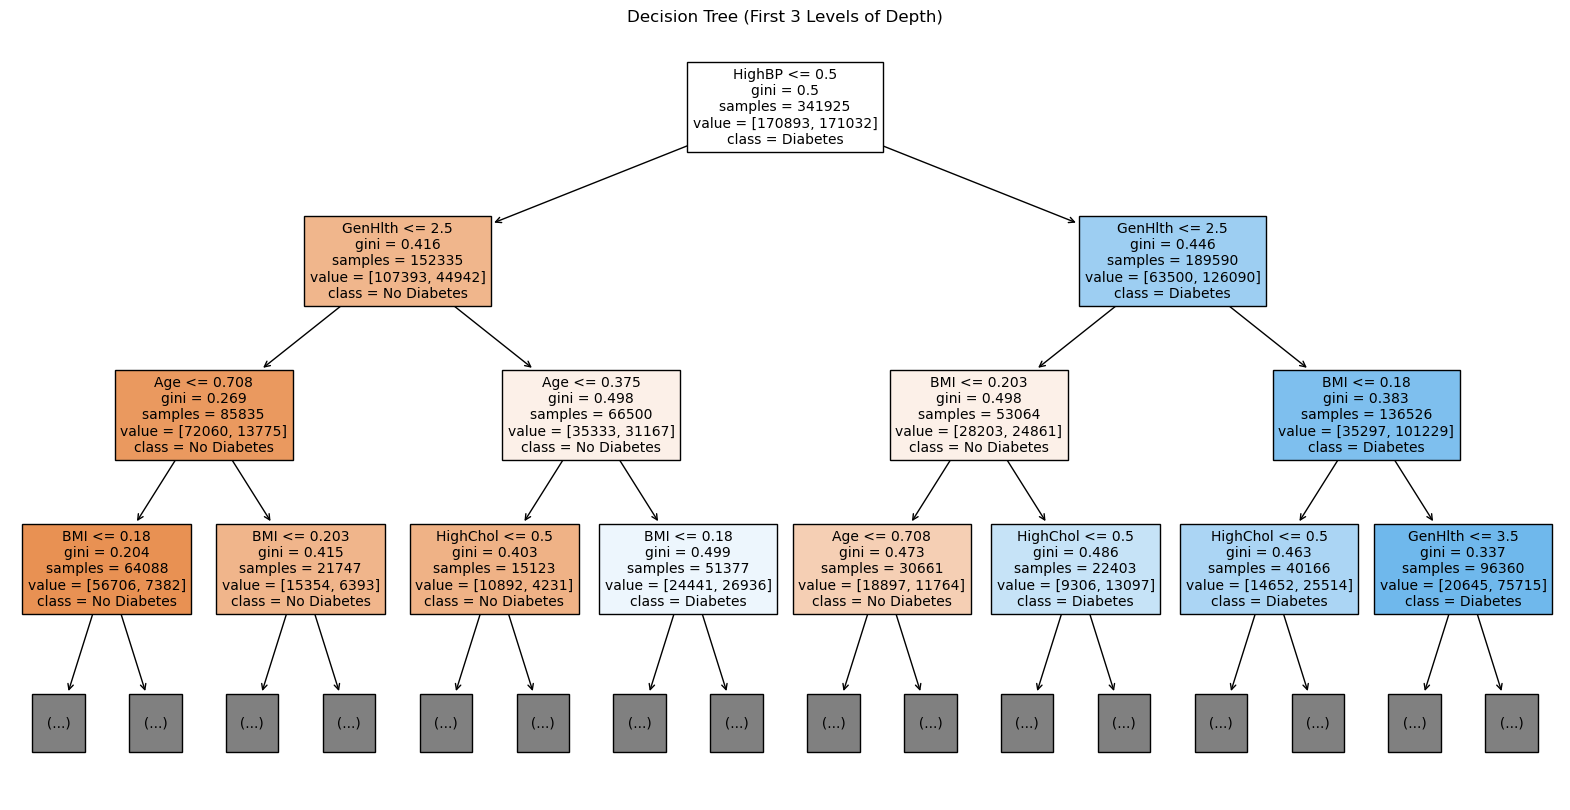

Train Score: 0.9579176720040945, Test Score: 0.8879166130485137


In [40]:
# fitting the tree and visualizing 
T = DecisionTreeClassifier(max_depth=24)
T.fit(X_train, y_train)

train_score = T.score(X_train, y_train)
test_score = T.score(X_test, y_test)


plt.figure(figsize=(20, 10)) 
plot_tree(T, 
          feature_names=X_train.columns, 
          class_names=['No Diabetes', 'Diabetes'], 
          filled=True, 
          max_depth=3, 
          fontsize=10)
plt.title("Decision Tree (First 3 Levels of Depth)")
# plt.savefig('decision_tree.png', dpi=300) 
plt.show()
print(f'Train Score: {train_score}, Test Score: {test_score}')

## Evaluating the models permormance
*Now that I have chosen the depth for my tree and fit the final classification tree I want to analyze my results and see if they align with some of the goals I established in the beginning of this project. 

I found that with a depth of 24 I have an test accuracy of 88.7%. Knowing this I want to take a look at the precision and recall to see what kind of false positives and negatives exist in the predicitons.*

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = T.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Accuracy:  0.8879
Precision: 0.8389
Recall:    0.9597
F1 Score:  0.8953


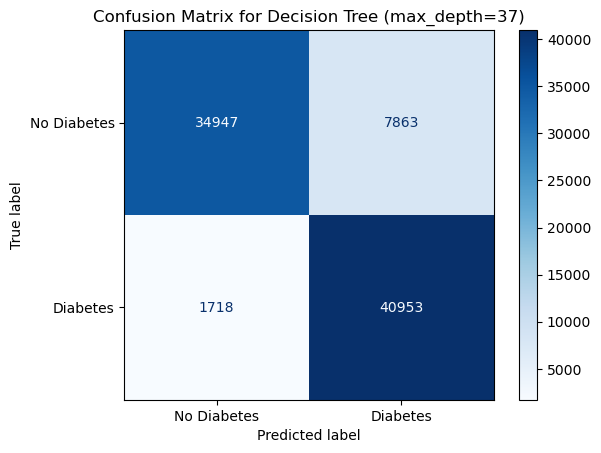

True Negatives: 34947
False Positives: 7863
False Negatives: 1718
True Positives: 40953


In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = T.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Decision Tree (max_depth=37)')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight') 
plt.show()
(tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

## Analysis in the context of Diabetes prediction 
*The model has a recall of 96% and a precision of 83%. In the context of this project a high recall is a good thing because it means that the model does not often predict someone as not having diabetes when they really do (False negatives). The precision score is less desirable but in the context of diabetes prediction there is less consequences for False Positives. If someone tests positive when they do not have diabetes it can be easily ruled out through medical testing. However, if the model says someone does not have diabetes when they really do have it, then that could potentially result in them not getting treated soon enough.*